<a href="https://colab.research.google.com/github/FuriousBluffer/shiny-sniffle/blob/main/AI_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1: Gathering & Cleaning Data

**Fitness Device Data:**


 
After importing the required libraries, fitness data of various people had been downlaoded from kaggle.The dataset has many files involving daily calories, routines, etc.

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
d_act=pd.read_csv(r"/content/drive/MyDrive/FitBit/dailyActivity_merged.csv")
h_cal=pd.read_csv(r"/content/drive/MyDrive/FitBit/hourlyCalories_merged.csv")
h_steps=pd.read_csv(r"/content/drive/MyDrive/FitBit/hourlySteps_merged.csv")
d_sleep=pd.read_csv(r"/content/drive/MyDrive/FitBit/sleepDay_merged.csv")
weight=pd.read_csv(r"/content/drive/MyDrive/FitBit/weightLogInfo_merged.csv")
d_act.shape
d_act.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


**Filtering** only useful columns for our analysis


In [106]:
d_act=d_act[["Id","ActivityDate","TotalSteps","TotalDistance","VeryActiveMinutes","FairlyActiveMinutes","LightlyActiveMinutes","SedentaryMinutes","Calories"]]

In [107]:
d_act.info()
print('\nNo. of duplicate rows=',d_act.duplicated().sum())
print('Number of participants=',d_act.Id.nunique())
d_act.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    940 non-null    int64  
 1   ActivityDate          940 non-null    object 
 2   TotalSteps            940 non-null    int64  
 3   TotalDistance         940 non-null    float64
 4   VeryActiveMinutes     940 non-null    int64  
 5   FairlyActiveMinutes   940 non-null    int64  
 6   LightlyActiveMinutes  940 non-null    int64  
 7   SedentaryMinutes      940 non-null    int64  
 8   Calories              940 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 66.2+ KB

No. of duplicate rows= 0
Number of participants= 33


,Id,TotalSteps,TotalDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,210.000000,143.000000,518.000000,1440.000000,4900.000000


Findings:

1. Data is clean and has no wrong or null or duplicate entry.

2. No. of participants=33

3. Minimum value of every column is zero signifying that some users have disabled a particular features on some days. So, we will apply relevant filters on particular column during its analysis.

4. We need to derive and add new column named Day using the Date. As people tend to relax on weekends so this will help us analyze that separately(will be done in next cell).

In [108]:
d_act.ActivityDate=pd.to_datetime(d_act.ActivityDate)
d_act['Day']=d_act.ActivityDate.dt.day_name()
print("Sample Processed data:")
d_act.head()

Sample Processed data:


,Id,ActivityDate,TotalSteps,TotalDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Day
0,1503960366,2016-04-12,13162,8.50,25,13,328,728,1985,Tuesday
1,1503960366,2016-04-13,10735,6.97,21,19,217,776,1797,Wednesday
2,1503960366,2016-04-14,10460,6.74,30,11,181,1218,1776,Thursday
3,1503960366,2016-04-15,9762,6.28,29,34,209,726,1745,Friday
4,1503960366,2016-04-16,12669,8.16,36,10,221,773,1863,Saturday


**Hourly_Calories dataset:**

In [109]:
print("Sample data:")
h_cal.head()

Sample data:


,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


In [110]:
h_cal.info()
print('\nNo. of duplicate rows=',h_cal.duplicated().sum())
print('Number of participants=',h_cal.Id.nunique())
h_cal.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   Calories      22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB

No. of duplicate rows= 0
Number of participants= 33


,Id,Calories
count,2.209900e+04,22099.000000
mean,4.848235e+09,97.386760
std,2.422500e+09,60.702622
min,1.503960e+09,42.000000
25%,2.320127e+09,63.000000
50%,4.445115e+09,83.000000
75%,6.962181e+09,108.000000
max,8.877689e+09,948.000000


Findings:

1. Data is clean and has no wrong or null or duplicate entry.
2. No. of participants=33
3. ActivityHour column data needs to be convert to day and time(will be done in next cell).

In [111]:
h_cal.ActivityHour=pd.to_datetime(h_cal.ActivityHour)
h_cal.ActivityHour=h_cal.ActivityHour.astype(str)
h_cal["Date"]=h_cal.ActivityHour.str.split(expand=True)[0]
h_cal["Time"]=h_cal.ActivityHour.str.split(expand=True)[1]
h_cal.Date=pd.to_datetime(h_cal.Date)
h_cal["Day"]=h_cal.Date.dt.day_name()
print("Sample Processed data:")
h_cal.head()

Sample Processed data:


,Id,ActivityHour,Calories,Date,Time,Day
0,1503960366,2016-04-12 00:00:00,81,2016-04-12,00:00:00,Tuesday
1,1503960366,2016-04-12 01:00:00,61,2016-04-12,01:00:00,Tuesday
2,1503960366,2016-04-12 02:00:00,59,2016-04-12,02:00:00,Tuesday
3,1503960366,2016-04-12 03:00:00,47,2016-04-12,03:00:00,Tuesday
4,1503960366,2016-04-12 04:00:00,48,2016-04-12,04:00:00,Tuesday


**Hourly_Steps dataset:**

In [112]:
h_steps.info()
print('\nNo. of duplicate rows=',h_steps.duplicated().sum())
print('Number of participants=',h_steps.Id.nunique())
h_steps.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   StepTotal     22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB

No. of duplicate rows= 0
Number of participants= 33


,Id,StepTotal
count,2.209900e+04,22099.000000
mean,4.848235e+09,320.166342
std,2.422500e+09,690.384228
min,1.503960e+09,0.000000
25%,2.320127e+09,0.000000
50%,4.445115e+09,40.000000
75%,6.962181e+09,357.000000
max,8.877689e+09,10554.000000


In [113]:
print("Sample data:")
h_steps.head()

Sample data:


,Id,ActivityHour,StepTotal
0,1503960366,04-12-2016 00:00,373
1,1503960366,04-12-2016 01:00,160
2,1503960366,04-12-2016 02:00,151
3,1503960366,04-12-2016 03:00,0
4,1503960366,04-12-2016 04:00,0


Findings:

1. Data is clean and has no wrong or null or duplicate entry.
2. No. of participants=33
3. ActivityHour column data needs to be convert to day and time(will be done in next cell).

In [114]:
h_steps.ActivityHour=pd.to_datetime(h_steps.ActivityHour)
h_steps.ActivityHour=h_steps.ActivityHour.astype(str)
h_steps["Date"]=h_steps.ActivityHour.str.split(expand=True)[0]
h_steps["Time"]=h_steps.ActivityHour.str.split(expand=True)[1]
h_steps.Date=pd.to_datetime(h_steps.Date)
h_steps["Day"]=h_steps.Date.dt.day_name()
print("Sample Processed data:")
h_steps.head()

Sample Processed data:


,Id,ActivityHour,StepTotal,Date,Time,Day
0,1503960366,2016-04-12 00:00:00,373,2016-04-12,00:00:00,Tuesday
1,1503960366,2016-04-12 01:00:00,160,2016-04-12,01:00:00,Tuesday
2,1503960366,2016-04-12 02:00:00,151,2016-04-12,02:00:00,Tuesday
3,1503960366,2016-04-12 03:00:00,0,2016-04-12,03:00:00,Tuesday
4,1503960366,2016-04-12 04:00:00,0,2016-04-12,04:00:00,Tuesday


Daily_Sleep dataset:

In [115]:
print("Sample data:")
d_sleep.head()

Sample data:


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


 Filtering useful columns

In [116]:
d_sleep=d_sleep[["Id","SleepDay","TotalMinutesAsleep"]]

In [117]:
d_sleep.info()
print('\nNo. of duplicate rows=',d_sleep.duplicated().sum())
print('Number of participants=',d_sleep.Id.nunique())
d_sleep.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalMinutesAsleep  413 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 9.8+ KB

No. of duplicate rows= 3
Number of participants= 24


,Id,TotalMinutesAsleep
count,4.130000e+02,413.000000
mean,5.000979e+09,419.467312
std,2.060360e+09,118.344679
min,1.503960e+09,58.000000
25%,3.977334e+09,361.000000
50%,4.702922e+09,433.000000
75%,6.962181e+09,490.000000
max,8.792010e+09,796.000000


Findings:

1. Data is clean and has no wrong or null or duplicate entry.
2. No. of participants=24
3. SleepDay column's format needs to be converted to datetime(will be done in next cell).
4. There are 3 duplicate entries(will be removed in next cell).

In [118]:
d_sleep.rename(columns={"SleepDay":"Date"},inplace=True)
d_sleep.Date=pd.to_datetime(d_sleep.Date)
d_sleep["Day"]=d_sleep.Date.dt.day_name()
print("Sample Processed Data:")
d_sleep.drop_duplicates(inplace=True)
d_sleep.head()

Sample Processed Data:


,Id,Date,TotalMinutesAsleep,Day
0,1503960366,2016-04-12,327,Tuesday
1,1503960366,2016-04-13,384,Wednesday
2,1503960366,2016-04-15,412,Friday
3,1503960366,2016-04-16,340,Saturday
4,1503960366,2016-04-17,700,Sunday


**Weights dataset:**

In [119]:
print("Sample Data:")
weight.head()

Sample Data:


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [120]:
weight.info()
print('\nNo. of duplicate rows=',weight.duplicated().sum())
print('Number of participants=',weight.Id.nunique())
weight.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB

No. of duplicate rows= 0
Number of participants= 8


,Id,WeightKg,WeightPounds,Fat,BMI,LogId
count,6.700000e+01,67.000000,67.000000,2.00000,67.000000,6.700000e+01
mean,7.009282e+09,72.035821,158.811801,23.50000,25.185224,1.461772e+12
std,1.950322e+09,13.923206,30.695415,2.12132,3.066963,7.829948e+08
min,1.503960e+09,52.599998,115.963147,22.00000,21.450001,1.460444e+12
25%,6.962181e+09,61.400002,135.363832,22.75000,23.959999,1.461079e+12
50%,6.962181e+09,62.500000,137.788914,23.50000,24.389999,1.461802e+12
75%,8.877689e+09,85.049999,187.503152,24.25000,25.559999,1.462375e+12
max,8.877689e+09,133.500000,294.317120,25.00000,47.540001,1.463098e+12


Findings:

1. Data is clean and has no wrong or null or duplicate entry.
2. No. of participants=8 We need atleast 30 data points for having considerable accuracy of the analysis. Since, we have only 8 participants' data so analyzing it wouldn't give accurate resuts so lets ignore this dataset.

**Identify interesting facts,trend and relationships:**

Now lets analyze the processed data to find some interesting insights.

In [121]:
d_act["Active_Score"]=d_act.VeryActiveMinutes*0.4+d_act.FairlyActiveMinutes*0.2+d_act.LightlyActiveMinutes*0.1
u_act=pd.merge(d_act,d_sleep,left_on=['Id','ActivityDate'],right_on=['Id','Date'])

Developed a relative matrix named Active_Score that adds up the matrices :- VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes in the ratio 4:2:1. This will help us analyze other matrices with respect to activesness of people with ease.

As Sunday is a holiday let's see if we can find any significant effect of it on people's activity.(Here we will compare mean of all matrices of week days excluding Sunday with that of Sunday)

In [122]:
u_sleep=d_sleep[["TotalMinutesAsleep","Day"]].groupby("Day").mean().reset_index()
u_sleep.TotalMinutesAsleep=round(u_sleep.TotalMinutesAsleep/60,2)
u_sleep.rename(columns={"TotalMinutesAsleep":"Sleep_hours"},inplace=True)
u_sleep=u_sleep.sort_values(by=["Sleep_hours"],ascending=False).reset_index(drop=True)
print("Mean of Sleep_hours of all weekdays except Sunday=",round(u_sleep["Sleep_hours"][u_sleep.Day!="Sunday"].mean(),1))
u_sleep

Mean of Sleep_hours of all weekdays except Sunday= 6.9


,Day,Sleep_hours
0,Sunday,7.55
1,Wednesday,7.24
2,Monday,6.99
3,Saturday,6.98
4,Friday,6.76
5,Tuesday,6.74
6,Thursday,6.69


People generally sleep 40 min extra on Sunday which is equivalent to 9.4% more as compared to other days.

Lets find out how other matrices differ on Sunday:

In [123]:
import warnings
warnings.filterwarnings("ignore") #To avoid unnecessary warnings

In [124]:
sd_act=d_act[d_act.TotalSteps>0]
sd_act=sd_act[d_act.Calories>0]
print("Filtered out the data containg TotalSteps and Calories as 0.")

Filtered out the data containg TotalSteps and Calories as 0.


In [125]:
week_sd_act=sd_act[sd_act.columns.difference(["Id","ActivityDate"])].groupby("Day").mean().reset_index()
print("Average of matrices of all days except Sunday:")
round(week_sd_act[["Active_Score","Calories","SedentaryMinutes","TotalDistance","TotalSteps"]][week_sd_act.Day!="Sunday"].mean(),1)

Average of matrices of all days except Sunday:


Active_Score          33.5
Calories            2370.1
SedentaryMinutes     957.8
TotalDistance          6.0
TotalSteps          8424.6
dtype: float64

In [126]:
round(week_sd_act[["Day","Active_Score","Calories","SedentaryMinutes","TotalDistance","TotalSteps"]][week_sd_act.Day=="Sunday"],1)

,Day,Active_Score,Calories,SedentaryMinutes,TotalDistance,TotalSteps
3,Sunday,31.1,2310.9,945.3,5.5,7626.6


There is a significant differences in Active_Score, Calories, TotalDistance and TotalSteps. So lets analyze them:

In [127]:
week_sd_act[["Day","Active_Score","Calories","TotalDistance","TotalSteps"]]

,Day,Active_Score,Calories,TotalDistance,TotalSteps
0,Friday,32.407500,2351.608333,5.575417,7820.641667
1,Monday,34.090000,2385.618182,6.057727,8488.218182
2,Saturday,35.571681,2428.752212,6.424602,8946.628319
3,Sunday,31.126364,2310.927273,5.529909,7626.554545
4,Thursday,31.718045,2274.436090,5.871429,8185.398496
5,Tuesday,35.007246,2440.978261,6.423913,8949.282609
6,Wednesday,32.284892,2339.431655,5.922662,8157.597122


Findings:

1. People travel 8.3% less on Sunday as compared to other days.
2. People walk 9.5% less on Sunday as compared to other days.
3. For other matrices Data for Sunday is not significantly different.

16 people out of 33 walk less than 7500 steps a day




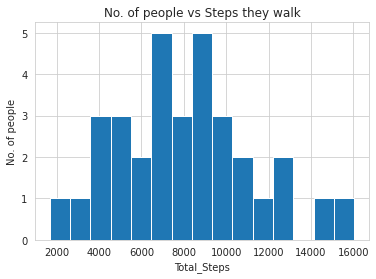

In [128]:
sd_act=d_act[d_act.TotalSteps>0]
id_act=sd_act.groupby(sd_act.Id).mean().reset_index() #Used filtered data with TotalSteps >0
print((id_act.TotalSteps<7500).sum(),"people out of 33 walk less than 7500 steps a day")
print("\n")
plt.hist(id_act.TotalSteps,bins=15)
plt.xlabel("Total_Steps")
plt.ylabel("No. of people")
plt.title("No. of people vs Steps they walk");

**16 out of 33 users take less than 7500 steps which is equivalent to 48.5%.** This seems to be a major concern and I think we should try to address this.

Suggesstions:

1. Notify frequently with the number of steps left to complete daily quota. Frequency can be increased for people having record of walking less.
2. To develop an algorithm that will notify people at evening or at night to go for an walk if their step count is less than 7500.

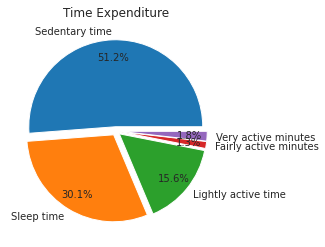

In [129]:
data=[u_act.SedentaryMinutes.mean(),u_act.TotalMinutesAsleep.mean(),u_act.LightlyActiveMinutes.mean(),u_act.FairlyActiveMinutes.mean(),u_act.VeryActiveMinutes.mean()]
labels=["Sedentary time","Sleep time","Lightly active time","Fairly active minutes","Very active minutes"]
plt.pie(x=data,autopct="%.1f%%",explode=[0.05]*5, labels=labels, pctdistance=0.8)
plt.title("Time Expenditure");

**Findings:**
1. On average people are sleeping 30% of total time which comes out to be 7.2 hours which is good.
2. Sedentary time is 51% that is approx 12 hours. This time needs to be decrease as spending too much time in sedentary have very bad effect on health.

Let's study effect of number of steps on Calories burned along with the activeness of the people.

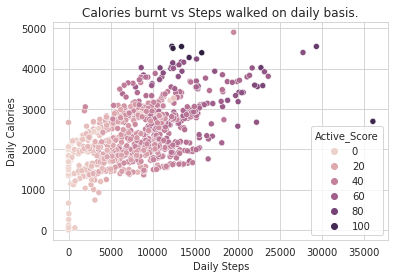

In [130]:
g=sns.scatterplot(x=d_act.TotalSteps,y=d_act.Calories,hue=d_act.Active_Score);
g.set(xlabel="Daily Steps",ylabel="Daily Calories",title="Calories burnt vs Steps walked on daily basis.");

**Findings:**

1. Positive correlation has been found between Daily steps and calories.
2. Activeness tends to increase with more number of calories burned or with more number of steps.
3. Increase in activeness with increase in calories is observed between 10000-15000 daily steps. This shows that people with higher activity score are more fit and healthy.

Now let's visualize the graph of Variation in Calories burnt during the day to get most active periods in a day.

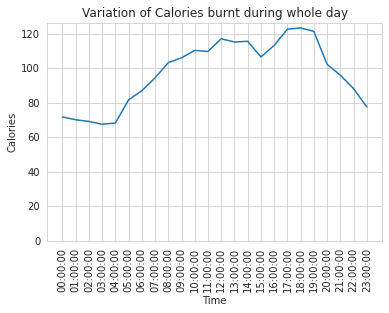

In [131]:
u_h_cal=h_cal[['Time','Calories']].groupby('Time').mean().reset_index()
plt.plot(u_h_cal.Time,u_h_cal.Calories)
plt.ylim(ymin=0)
plt.xticks(rotation=90)
plt.grid(True)
plt.xlabel("Time")
plt.ylabel("Calories");
plt.title("Variation of Calories burnt during whole day");

**Findings:**

1. Activeness tends to increase steadly from 4am to 12pm since graph goes on rising in this period. This signifies that generally people start to wake up between 4am-5am.
2. From 12pm to 3pm people tend to decrease their activites.This may signify that people start feeling tired from 12pm.
3. Drastic decrease in calories burned between 2pm to 3pm which may be due to relaxation after lunch.
4. People again tend to become more active from 3 pm till 7 pm with peak period from 5 pm to 7 pm. This may due to increased recreational activities in evening.

**Suggesstions:**

1. We can send motivational notification to exercise at around 5pm and 5am.
2. We can also send notification around 12pm to do any simple recreational activity (eg. drink water, breath exercise, recreational break or walk) so people get fresh.

Now let's see effect of sedentary on sleep quality:

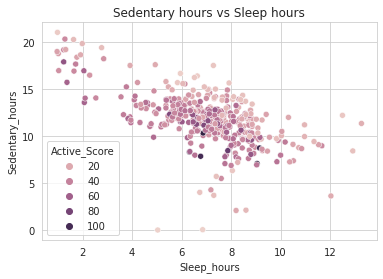

In [132]:
g=sns.scatterplot(x=u_act.TotalMinutesAsleep/60,y=u_act.SedentaryMinutes/60,hue=u_act.Active_Score)
sns.set_style('whitegrid')
g.set(xlabel='Sleep_hours',ylabel='Sedentary_hours',title="Sedentary hours vs Sleep hours")
sns.set_style("whitegrid");

**Findings:**

1. With more number of sedentary hours a depreciation in sleep quality is observed due to which sleep hours decreases.
2. Activeness tends to decrease with increase in sedentary hours. Since, Color tends to fade along y axis.
3. Most active users tend to have sleep between 6-9 hours and have Sedentary time of 7-13 hours.

**Suggesstions:**

1. For users having sleep time less than 6 hours we can send personalized notification to decrease their sedentary time for having good sleep quality.
2. Our goal can be to motivate most people to come under the sweet spot balancing Sleep hours and Sedentary hours which is 6-9 hours of sleep and 7-13 hours of sedentary time.

Let's find out how many hours do the most active people sleep so that we can get clear goal to motivate others.

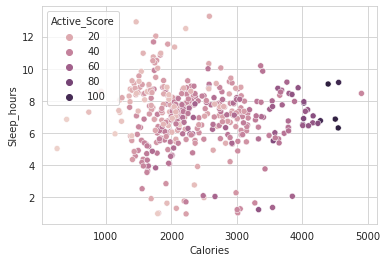

In [133]:
g=sns.scatterplot(x=u_act.Calories,y=u_act.TotalMinutesAsleep/60,hue=u_act.Active_Score);
g.set(ylabel="Sleep_hours");

**Findings:**

1. There are no dots in upper right and lower right region signifying the fact that for being most active we have to get right hours of sleep which is neither too high nor too low.
2. Most active people have Sleep hours between 6-9 hours.
People sleeping either less than 4 hours or more than 10 hours tend to be less active.

**Ideas:**

1. We can notify people with less sleep hours to atleast have 6 hours of sleep.
2. We can also encourage people with high sleep hours to reduce to 9-10 hours.

Let's find out what percent of people sleep less than 4 hours a day and more than 10 hours a day.

In [134]:
sd_act=u_act[u_act.TotalMinutesAsleep>0]
id_act=sd_act.groupby(sd_act.Id).mean().reset_index() #Used filtered data with sleep time >0
print((id_act.TotalMinutesAsleep<240).sum(),"people out of 33 sleep than 4 hours  a day")
print((id_act.TotalMinutesAsleep<300).sum(),"people out of 33 sleep than 5 hours  a day")
print((id_act.TotalMinutesAsleep>600).sum(),"person out of 33 sleep more than 10 hours a day")

3 people out of 33 sleep than 4 hours  a day
6 people out of 33 sleep than 5 hours  a day
1 person out of 33 sleep more than 10 hours a day


**Findings:**

1. 9.1% of people sleep less than 4 hours.
2. 3% of people sleep more than 10 hours a day.
3. Overall 12% people either sleep for very less hours or much more. These are the people who are not able to use their full potential.

In [135]:
import pandas as pd
import os
import glob
import datetime as dt
path = '/content/drive/MyDrive/FitBit'

filenames =  os.listdir(path)
print(filenames)

for filename in filenames:
    globals()[filename.split('.')[0]] = pd.read_csv(f"{path}/{filename}")
    print(filename.split('.')[0])

['minuteIntensitiesNarrow_merged (1).csv', 'minuteCaloriesWide_merged (1).csv', 'minuteIntensitiesNarrow_merged.csv', 'minuteCaloriesWide_merged.csv', 'minuteIntensitiesWide_merged (1).csv', 'minuteMETsNarrow_merged (1).csv', 'minuteMETsNarrow_merged.csv', 'minuteIntensitiesWide_merged.csv', 'minuteSleep_merged (1).csv', 'minuteStepsNarrow_merged (1).csv', 'minuteSleep_merged.csv', 'minuteStepsNarrow_merged.csv', 'minuteStepsWide_merged (1).csv', 'minuteStepsWide_merged.csv', 'dailyCalories_merged.csv', 'dailyActivity_merged.csv', 'dailyIntensities_merged.csv', 'dailySteps_merged.csv', 'sleepDay_merged.csv', 'weightLogInfo_merged.csv', 'hourlyCalories_merged.csv', 'hourlySteps_merged.csv', 'hourlyIntensities_merged.csv', 'minuteCaloriesNarrow_merged.csv']
minuteIntensitiesNarrow_merged (1)
minuteCaloriesWide_merged (1)
minuteIntensitiesNarrow_merged
minuteCaloriesWide_merged
minuteIntensitiesWide_merged (1)
minuteMETsNarrow_merged (1)
minuteMETsNarrow_merged
minuteIntensitiesWide_merge

In [136]:
print(len(hourlySteps_merged))
print(len(hourlyCalories_merged))
print(len(dailyCalories_merged))
print(len(dailySteps_merged))
print(len(sleepDay_merged))

22099
22099
940
940
413


In [137]:
hourlySteps_merged.head(3),hourlyCalories_merged.head(3),dailySteps_merged.head(3), dailyActivity_merged.head(3)

(           Id      ActivityHour  StepTotal
 0  1503960366  04-12-2016 00:00        373
 1  1503960366  04-12-2016 01:00        160
 2  1503960366  04-12-2016 02:00        151,
            Id           ActivityHour  Calories
 0  1503960366  4/12/2016 12:00:00 AM        81
 1  1503960366   4/12/2016 1:00:00 AM        61
 2  1503960366   4/12/2016 2:00:00 AM        59,
            Id ActivityDay  StepTotal
 0  1503960366   4/12/2016      13162
 1  1503960366   4/13/2016      10735
 2  1503960366   4/14/2016      10460,
            Id ActivityDate  ...  SedentaryMinutes  Calories
 0  1503960366    4/12/2016  ...               728      1985
 1  1503960366    4/13/2016  ...               776      1797
 2  1503960366    4/14/2016  ...              1218      1776
 
 [3 rows x 15 columns])

Merging datasets to create hourly and daily datasets for Easy Analysis.

In [138]:
#Merging Daily Data
dailyStuff = pd.merge(dailyActivity_merged, dailyCalories_merged, left_on = ["Id","ActivityDate"],
                  right_on = ["Id","ActivityDay"])
dailyStuff = pd.merge(dailyStuff,dailyIntensities_merged, on = ["Id","ActivityDay"])
dailyStuff = pd.merge(dailyStuff,dailySteps_merged, on = ["Id","ActivityDay"])

#Making Activity Day datetime and getting only the date part to merge with sleep data (now this column is not datetime)
dailyStuff['ActivityDay'] = pd.to_datetime(dailyStuff['ActivityDay']).dt.date

#making sleepday's SleepDay column datetime and getting only the date
#Since, everydays sleep time is 12.00 AM, We dont have much use of that data (now this column is not datetime)
sleepDay_merged['SleepDay']= pd.to_datetime(sleepDay_merged['SleepDay']).dt.date

#creating a new dataframe  with sleepdata - this dataframe have less rows than dailyStuff dataframe
dailyStuff_with_Sleep = pd.merge(dailyStuff,sleepDay_merged, how = 'right',left_on = ["Id","ActivityDay"],
                                  right_on = ["Id","SleepDay"])

dailyStuff.head(4),dailyStuff_with_Sleep.head(4)

(           Id ActivityDate  ...  VeryActiveDistance_y  StepTotal
 0  1503960366    4/13/2016  ...                  1.57      10735
 1  1503960366    4/14/2016  ...                  2.44      10460
 2  1503960366    4/15/2016  ...                  2.14       9762
 3  1503960366    4/16/2016  ...                  2.71      12669
 
 [4 rows x 26 columns],
            Id ActivityDate  ...  TotalMinutesAsleep  TotalTimeInBed
 0  1503960366          NaN  ...                 327             346
 1  1503960366    4/13/2016  ...                 384             407
 2  1503960366    4/15/2016  ...                 412             442
 3  1503960366    4/16/2016  ...                 340             367
 
 [4 rows x 30 columns])

In [139]:
#Let's remove these columns because they are redundant and we don't need em.
dailyStuff.drop(['ActivityDate','Calories_y','SedentaryMinutes_y','LightlyActiveMinutes_y','SedentaryActiveDistance_y',
                 'FairlyActiveMinutes_y','VeryActiveMinutes_y','LightActiveDistance_y','ModeratelyActiveDistance_y',
                'VeryActiveDistance_y','StepTotal'],inplace = True,axis = 1)
dailyStuff_with_Sleep.drop(['ActivityDate','SleepDay','Calories_y','SedentaryMinutes_y','LightlyActiveMinutes_y',
                            'SedentaryActiveDistance_y','FairlyActiveMinutes_y','VeryActiveMinutes_y',
                            'LightActiveDistance_y','ModeratelyActiveDistance_y', 'VeryActiveDistance_y',
                            'StepTotal'],inplace = True,axis = 1)

#and now lets rename some columns
dailyStuff.rename(columns = {'Calories_x':'Calories','SedentaryMinutes_x':'SedentaryMinutes',
                            'LightlyActiveMinutes_x':'LightlyActiveMinutes','FairlyActiveMinutes_x':'FairlyActiveMinutes',
                            'VeryActiveMinutes_x':'VeryActiveMinutes','SedentaryMinutes_x':'SedentaryMinutes',
                            'LightActiveDistance_x':'LightActiveDistance','ModeratelyActiveDistance_x':'ModeratelyActiveDistance',
                            'VeryActiveDistance_x':'VeryActiveDistance','SedentaryActiveDistance_x':'SedentaryActiveDistance'},inplace = True)
dailyStuff_with_Sleep.rename(columns = {'Calories_x':'Calories','SedentaryMinutes_x':'SedentaryMinutes',
                            'LightlyActiveMinutes_x':'LightlyActiveMinutes','FairlyActiveMinutes_x':'FairlyActiveMinutes',
                            'VeryActiveMinutes_x':'VeryActiveMinutes','SedentaryMinutes_x':'SedentaryMinutes',
                            'LightActiveDistance_x':'LightActiveDistance','ModeratelyActiveDistance_x':'ModeratelyActiveDistance',
                            'VeryActiveDistance_x':'VeryActiveDistance','SedentaryActiveDistance_x':'SedentaryActiveDistance'},inplace = True)

In [140]:
dailyStuff_with_Sleep = dailyStuff_with_Sleep.iloc[1: , :]
dailyStuff_with_Sleep.head()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActivityDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
1,1503960366,10735.0,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21.0,19.0,217.0,776.0,1797.0,2016-04-13,2,384,407
2,1503960366,9762.0,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29.0,34.0,209.0,726.0,1745.0,2016-04-15,1,412,442
3,1503960366,12669.0,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36.0,10.0,221.0,773.0,1863.0,2016-04-16,2,340,367
4,1503960366,9705.0,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38.0,20.0,164.0,539.0,1728.0,2016-04-17,1,700,712
5,1503960366,15506.0,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50.0,31.0,264.0,775.0,2035.0,2016-04-19,1,304,320


In [141]:
#Merging Hourly Data
hourlyStuff = pd.merge(hourlyCalories_merged,hourlyIntensities_merged,on = ["Id","ActivityHour"])
hourlyStuff = pd.merge(hourlyStuff,hourlySteps_merged,on = ["Id","ActivityHour"])

#creating a new column with hour of the day because it might be useful in the future
hourlyStuff['Hour'] = pd.to_datetime(hourlyStuff['ActivityHour']).dt.hour
hourlyStuff.head(4)

,Id,ActivityHour,Calories,TotalIntensity,AverageIntensity,StepTotal,Hour
0,1503960366,4/13/2016 12:00:00 AM,69,14,0.233333,144,0
1,1503960366,4/13/2016 1:00:00 AM,48,0,0.000000,0,1
2,1503960366,4/13/2016 2:00:00 AM,47,0,0.000000,0,2
3,1503960366,4/13/2016 3:00:00 AM,53,4,0.066667,36,3


In [142]:
dailyStuff.info()
dailyStuff_with_Sleep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578 entries, 0 to 577
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        578 non-null    int64  
 1   TotalSteps                578 non-null    int64  
 2   TotalDistance             578 non-null    float64
 3   TrackerDistance           578 non-null    float64
 4   LoggedActivitiesDistance  578 non-null    float64
 5   VeryActiveDistance        578 non-null    float64
 6   ModeratelyActiveDistance  578 non-null    float64
 7   LightActiveDistance       578 non-null    float64
 8   SedentaryActiveDistance   578 non-null    float64
 9   VeryActiveMinutes         578 non-null    int64  
 10  FairlyActiveMinutes       578 non-null    int64  
 11  LightlyActiveMinutes      578 non-null    int64  
 12  SedentaryMinutes          578 non-null    int64  
 13  Calories                  578 non-null    int64  
 14  ActivityDa

We can see that most data types assigned are correct. We will have to convert ActivityDay to a datetime type as well. And the other thing that concerns little bit is the User Id data type which is set to numeric. Since we used data collected from 33 differant users, we can set them to categorical type as well. But, Since we are not analyzing individuals' activities we can leave it as it is or convert to string type. We'll do the latter.

In [143]:
dailyStuff['ActivityDay'] = pd.to_datetime(dailyStuff['ActivityDay'])
dailyStuff['Day'] = dailyStuff['ActivityDay'].dt.day_name()
dailyStuff_with_Sleep['ActivityDay'] = pd.to_datetime(dailyStuff_with_Sleep['ActivityDay'])
dailyStuff_with_Sleep['Day'] = dailyStuff_with_Sleep['ActivityDay'].dt.day_name()
dailyStuff['Id'] = dailyStuff['Id'].astype('string')
dailyStuff_with_Sleep['Id'] = dailyStuff_with_Sleep['Id'].astype('string')

In [144]:
dailyStuff.head()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActivityDay,Day
0,1503960366,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2016-04-13,Wednesday
1,1503960366,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,2016-04-14,Thursday
2,1503960366,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,2016-04-15,Friday
3,1503960366,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2016-04-16,Saturday
4,1503960366,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,2016-04-17,Sunday


In [145]:
hourlyStuff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13821 entries, 0 to 13820
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                13821 non-null  int64  
 1   ActivityHour      13821 non-null  object 
 2   Calories          13821 non-null  int64  
 3   TotalIntensity    13821 non-null  int64  
 4   AverageIntensity  13821 non-null  float64
 5   StepTotal         13821 non-null  int64  
 6   Hour              13821 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 863.8+ KB


We can see that Activity hour, Id, Hour are in the wrong format. I can convert it to string type. I will need to convert Activity Hour to datetime. Even though technically Hour column is also datetime, it's more useful in the categorical format for us. You'll see why later.

In [146]:
hourlyStuff['Hour'] = hourlyStuff['Hour'].astype('category') #categorical
hourlyStuff['Id'] = hourlyStuff['Id'].astype('string')

In [147]:
hourlyStuff.head(4)

,Id,ActivityHour,Calories,TotalIntensity,AverageIntensity,StepTotal,Hour
0,1503960366,4/13/2016 12:00:00 AM,69,14,0.233333,144,0
1,1503960366,4/13/2016 1:00:00 AM,48,0,0.000000,0,1
2,1503960366,4/13/2016 2:00:00 AM,47,0,0.000000,0,2
3,1503960366,4/13/2016 3:00:00 AM,53,4,0.066667,36,3


In [148]:
#Checking  how many Participants are in our datasets
print(dailyStuff["Id"].nunique())
print(dailyStuff_with_Sleep["Id"].nunique())
print(hourlyStuff["Id"].nunique())

33
24
33


We can see that Dailystuff and hourlystuff data sets have 33 participants, and daily with sleep have 24 participants

In [149]:
#Checking if there are any missing values in our dataframes
print(dailyStuff_with_Sleep.isnull().values.any()) #gives us true or false, df.isnull().values.sum() = gives us number of missing values
print(dailyStuff.isnull().values.any())
print(hourlyStuff.isnull().values.any())

True
False
False


Since we don't have any missing values, We can proceed with the analysis!

# Section 2: Data Exploration






In [150]:
from  matplotlib import pyplot as plt
import seaborn as sns

In [151]:
#Looking at daily average statistics
dailyStuff[['TotalSteps','TotalDistance','Calories','SedentaryMinutes']].mean()

TotalSteps          7787.032872
TotalDistance          5.591955
Calories            2339.903114
SedentaryMinutes    1004.500000
dtype: float64

Total steps amount is slightly less than the amount recommended by CDC which is 8000 Steps. According to Healthline, Average caloric expenditure of females is 2100 calories and for males its 2600. In this dataset, gender of users is not available. So, mean value of 2300 is acceptable

In [152]:
#Average Sleep Statistics
print(dailyStuff_with_Sleep[['TotalMinutesAsleep','TotalTimeInBed']].mean())
print("Ratio Between Average Sleep time and Average Total time in bed: "+
     str(dailyStuff_with_Sleep['TotalMinutesAsleep'].mean()/dailyStuff_with_Sleep['TotalTimeInBed'].mean()))

TotalMinutesAsleep    419.691748
TotalTimeInBed        458.912621
dtype: float64
Ratio Between Average Sleep time and Average Total time in bed: 0.914535203520352


We can see that in Average Users are Asleep for 91% of the total time in Bed

,index,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes
0,mean,1004.5,198.320069,13.733564,22.060554


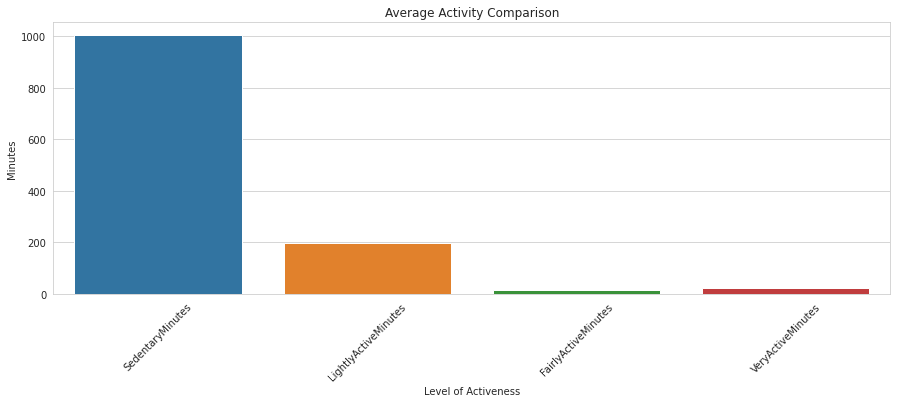

In [153]:
#Let's visualize average values of Types of Active Minutes
dailyActivityMean = dailyStuff.agg(
{'SedentaryMinutes': ['mean'],'LightlyActiveMinutes': ['mean'],
 'FairlyActiveMinutes': ['mean'],'VeryActiveMinutes': ['mean']}).reset_index()
plt.figure(figsize = (15,5))
plt1 = sns.barplot(data = dailyActivityMean)
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=45)
plt1.set(xlabel='Level of Activeness', ylabel='Minutes',title = 'Average Activity Comparison')
dailyActivityMean

,index,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes
0,mean,1004.5,198.320069,13.733564,22.060554


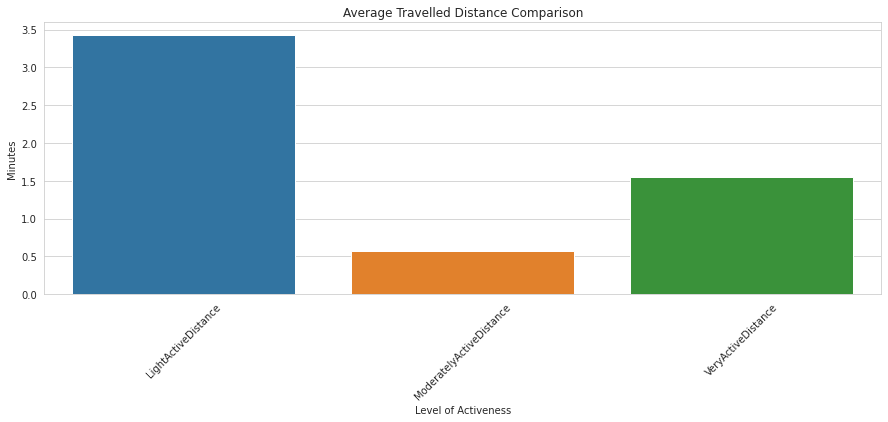

In [154]:
#Let's visualize average distances travelled with Active Levels
#Sedentary Active Distance dont make any sense because you can you cant walk while being sedentary
#So, We'll drop it
dailyStuff.drop(['SedentaryActiveDistance'],inplace = True,axis = 1)
dailyStuff_with_Sleep.drop(['SedentaryActiveDistance'],inplace = True,axis = 1)
dailyDistanceMean = dailyStuff.agg(
{'LightActiveDistance': ['mean'],
 'ModeratelyActiveDistance': ['mean'],'VeryActiveDistance': ['mean']}).reset_index()
plt.figure(figsize = (15,5))
plt1 = sns.barplot(data = dailyDistanceMean)
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=45)
plt1.set(xlabel='Level of Activeness', ylabel='Minutes',title = 'Average Travelled Distance Comparison')
dailyActivityMean

We can see that users are mostly lightly active when travelling.

,Day,TotalActiveMinutes,DayNum
1,Monday,230.734375,0
5,Tuesday,238.671875,1
6,Wednesday,230.216495,2
4,Thursday,232.597938,3
0,Friday,237.175258,4
2,Saturday,252.926316,5
3,Sunday,208.578125,6


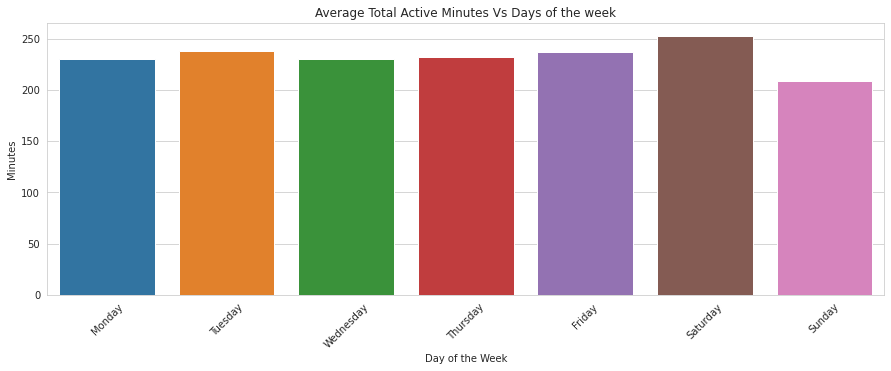

In [155]:
#Lets visualize How long users are active (Minutes) according to the day of the week.
#Getting total Active minutes (we don't need sedenatary because it's not really active)
dailyStuff['TotalActiveMinutes'] = dailyStuff[['LightlyActiveMinutes',
 'FairlyActiveMinutes','VeryActiveMinutes']].sum(axis = 1)
TotalActivitybyDay =  dailyStuff.groupby(['Day']).agg({'TotalActiveMinutes':'mean'}).reset_index()
df_mapping = pd.DataFrame({
    'Day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday']})
sort_mapping = df_mapping.reset_index().set_index('Day')
TotalActivitybyDay['DayNum'] = TotalActivitybyDay['Day'].map(sort_mapping['index'])
TotalActivitybyDay.sort_values(['DayNum'],inplace =True)
plt.figure(figsize = (15,5))
plt1 = sns.barplot(data = TotalActivitybyDay,x = "Day",y = "TotalActiveMinutes")
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=45)
plt1.set(xlabel='Day of the Week', ylabel='Minutes',title = 'Average Total Active Minutes Vs Days of the week')

TotalActivitybyDay

We can see that there are no significant differences in active minutes by days of the week.

In [156]:
#Comprehensive Days of the Week vs Active Sedentary Minutes
ActiveMinutesTypesbyDay = dailyStuff.groupby(['Day']).agg({
    'SedentaryMinutes':'mean','LightlyActiveMinutes':'mean',
    'FairlyActiveMinutes':'mean','VeryActiveMinutes':'mean'}).reset_index()
ActiveMinutesTypesbyDay['DayNum'] = ActiveMinutesTypesbyDay['Day'].map(sort_mapping['index'])
ActiveMinutesTypesbyDay.sort_values(['DayNum'],inplace =True)
ActiveMinutesTypesbyDay.drop('DayNum',inplace = True,axis = 1)

ActiveMinutesTypesbyDay

,Day,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes
1,Monday,1049.953125,190.578125,13.750000,26.406250
5,Tuesday,1014.671875,201.078125,15.703125,21.890625
6,Wednesday,1000.278351,194.175258,13.340206,22.701031
4,Thursday,1007.896907,197.649485,13.041237,21.907216
0,Friday,993.979381,204.876289,12.350515,19.948454
2,Saturday,967.452632,215.052632,15.557895,22.315789
3,Sunday,1021.062500,175.828125,12.781250,19.968750


In order to plot correctly, We need to melt the dataset with respect to the Day column. This is sort of like converting Wide Table to Long Table

In [157]:
melted_ActiveMinutesTypesbyDay = ActiveMinutesTypesbyDay.melt('Day',var_name = 'ActivityLevel',value_name = 'Minutes')
melted_ActiveMinutesTypesbyDay

,Day,ActivityLevel,Minutes
0,Monday,SedentaryMinutes,1049.953125
1,Tuesday,SedentaryMinutes,1014.671875
2,Wednesday,SedentaryMinutes,1000.278351
3,Thursday,SedentaryMinutes,1007.896907
4,Friday,SedentaryMinutes,993.979381
5,Saturday,SedentaryMinutes,967.452632
6,Sunday,SedentaryMinutes,1021.062500
7,Monday,LightlyActiveMinutes,190.578125
8,Tuesday,LightlyActiveMinutes,201.078125
9,Wednesday,LightlyActiveMinutes,194.175258


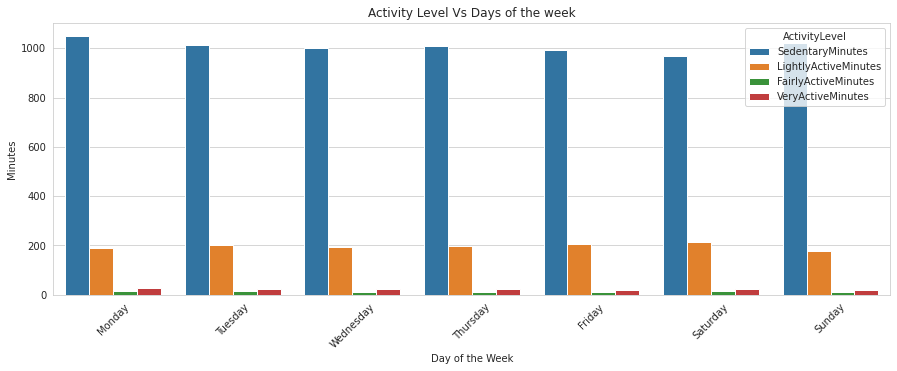

In [158]:
#Plotting
plt.figure(figsize = (15,5))
plt1 = sns.barplot(data = melted_ActiveMinutesTypesbyDay,x = 'Day',y = 'Minutes',hue = 'ActivityLevel')
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=45)
plt1.set(xlabel='Day of the Week', ylabel='Minutes',title = 'Activity Level Vs Days of the week')
plt.show()

We can see that users have a consistant Activity Type Durations throughout the week.

**Now Let's Do the Same for Distance**

In [159]:
#Comprehensive Days of the Week vs Active Sedentary Minutes
DistanceTravelledTypesbyDay = dailyStuff.groupby(['Day']).agg({
    'LightActiveDistance':'mean','ModeratelyActiveDistance':'mean',
    'VeryActiveDistance':'mean'}).reset_index()
DistanceTravelledTypesbyDay['DayNum'] = ActiveMinutesTypesbyDay['Day'].map(sort_mapping['index'])
DistanceTravelledTypesbyDay.sort_values(['DayNum'],inplace =True)
DistanceTravelledTypesbyDay.drop('DayNum',inplace = True,axis = 1)

DistanceTravelledTypesbyDay

,Day,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
1,Monday,3.337500,0.573125,1.724531
5,Tuesday,3.468906,0.619375,1.607187
6,Wednesday,3.326804,0.523608,1.724021
4,Thursday,3.449588,0.534227,1.567629
0,Friday,3.504124,0.489381,1.244742
2,Saturday,3.765789,0.679895,1.582526
3,Sunday,2.950781,0.557656,1.456094


In [160]:
#Melting the dataset
melted_DistanceTravelledTypesbyDay = DistanceTravelledTypesbyDay.melt('Day',var_name = 'DistanceType',value_name = 'Distance')
melted_DistanceTravelledTypesbyDay

,Day,DistanceType,Distance
0,Monday,LightActiveDistance,3.337500
1,Tuesday,LightActiveDistance,3.468906
2,Wednesday,LightActiveDistance,3.326804
3,Thursday,LightActiveDistance,3.449588
4,Friday,LightActiveDistance,3.504124
5,Saturday,LightActiveDistance,3.765789
6,Sunday,LightActiveDistance,2.950781
7,Monday,ModeratelyActiveDistance,0.573125
8,Tuesday,ModeratelyActiveDistance,0.619375
9,Wednesday,ModeratelyActiveDistance,0.523608


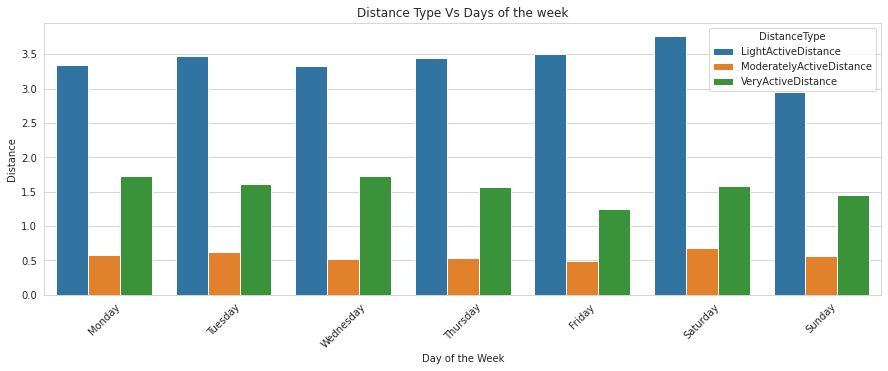

In [161]:
#Plotting the dataset
plt.figure(figsize = (15,5))
plt1 = sns.barplot(data = melted_DistanceTravelledTypesbyDay,x = 'Day',y = 'Distance',hue = 'DistanceType')
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=45)
plt1.set(xlabel='Day of the Week', ylabel='Distance',title = 'Distance Type Vs Days of the week')
plt.show()

Even for Distance, We can see that users have a consistant Distance Type Distances throughout the week.

**Now, Let's visualise the relationship between Distance Travelled and Total Active Minutes**

#Predictive Analysis

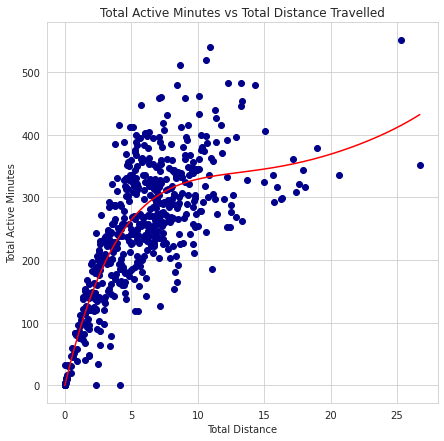

In [162]:
#Lets also draw a best fitting line / curve through the plot using Linear Regression
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree =5)

lin_reg = LinearRegression()
x = dailyStuff['TotalDistance'].values.reshape(-1,1)
y =dailyStuff['TotalActiveMinutes'].values.reshape(-1,1)
X_poly = poly_reg.fit_transform(x)
lin_reg.fit(X_poly,dailyStuff['TotalActiveMinutes'])
pred = lin_reg.predict(X_poly)

x_grid = np.arange(min(x),max(x),0.01)

plt.figure(figsize = (7,7))
plt.scatter(data = dailyStuff,x = 'TotalDistance',y = 'TotalActiveMinutes',color = 'darkblue')
plt.plot(x_grid ,lin_reg.predict(poly_reg.fit_transform(x_grid.reshape(-1,1))), color = 'red')
plt.xlabel("Total Distance")
plt.ylabel("Total Active Minutes")
plt.title("Total Active Minutes vs Total Distance Travelled")
plt.show()

We can see that their is a correlation between Total Active Minutes and Total Distance Travelled. Since the Fitbit fitness tracker collects Location (GPS) data, We can explain the outliers with Stationary exercising such as running on a trademill, stationary bike.. etc. And this is not exactly a linear relationship. Which is to be expected with this kind of data.

**Now, Let's visualise the relationship between Calories Burned and Total Active Minutes**

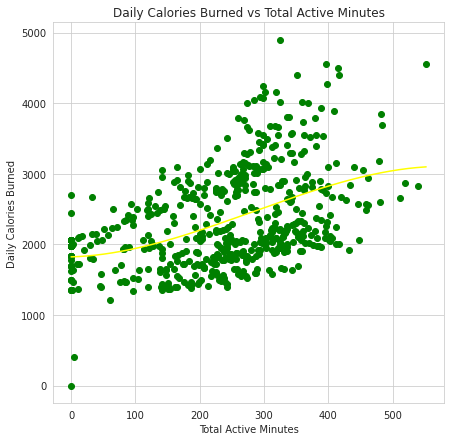

In [163]:
#Lets also draw a best fitting line / curve through the plot using Linear Regression
poly_reg = PolynomialFeatures(degree =3)
x = dailyStuff['TotalActiveMinutes'].values.reshape(-1,1)
y =dailyStuff['Calories'].values.reshape(-1,1)
X_poly = poly_reg.fit_transform(x)
lin_reg = LinearRegression()

lin_reg.fit(X_poly,y)
pred = lin_reg.predict(X_poly)

x_grid = np.arange(min(x),max(x),0.01)

plt.figure(figsize = (7,7))
plt.scatter(data = dailyStuff,x = 'TotalActiveMinutes',y = 'Calories',color = 'green')
plt.plot(x_grid ,lin_reg.predict(poly_reg.fit_transform(x_grid.reshape(-1,1))), color = 'yellow')
plt.xlabel("Total Active Minutes")
plt.ylabel("Daily Calories Burned")
plt.title("Daily Calories Burned vs Total Active Minutes")
plt.show()

We can observe a correlation between Daily Calories Burned and Total active Minutes. Obviously, THere will be a minimum amount of calories burned even if there is no active minutes. There are some incorrect data (where daily calories burned are zero) in our dataset. That data are incorrect because there it is impossible to not burn calories throughout the day. This maybe due to the user not wearing the fitness band throughout the day.

**It is kind of obvious that there is a postive correlation between Total steps taken and Total Distance travelled** So, We won't be looking at that data

**Hourly Data**

In [164]:
#Looking at Hourly average statistics
hourlyStuff[['Calories','TotalIntensity','StepTotal']].mean()

Calories           97.445047
TotalIntensity     12.199190
StepTotal         322.970335
dtype: float64

**Let's findout the Average calories burned throughout the day by Hour**

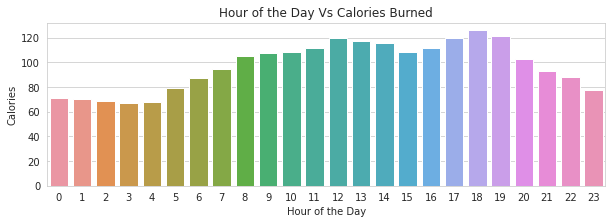

In [165]:
hourlyCalories = hourlyStuff.groupby(['Hour']).agg({'Calories':'mean'}).reset_index()

plt.figure(figsize = (10,3))
hC = sns.barplot(data = hourlyCalories,x = 'Hour',y = 'Calories')
hC.set(xlabel='Hour of the Day', ylabel='Calories',title = 'Hour of the Day Vs Calories Burned')
plt.show()
#hourlyCalories

We can see that most of the calories are burned during the day time.

**Now Let's See Amount of Steps taken (Average) throughout the day by Hour**

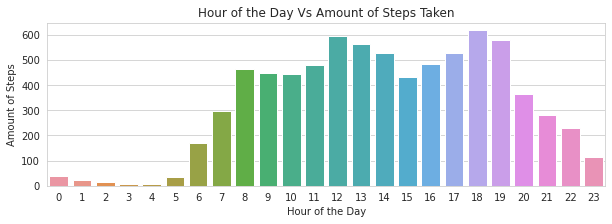

In [166]:
hourlySteps = hourlyStuff.groupby(['Hour']).agg({'StepTotal':'mean'}).reset_index()

plt.figure(figsize = (10,3))
hC = sns.barplot(data = hourlySteps,x = 'Hour',y = 'StepTotal')
hC.set(xlabel='Hour of the Day', ylabel='Amount of Steps',
       title = 'Hour of the Day Vs Amount of Steps Taken')
plt.show()
#hourlySteps

Unsuprisingly, during the night time, amount of steps taken is really low. Most amount of steps are taken during the day.

**Let's do the same thing for the Total Intensity**

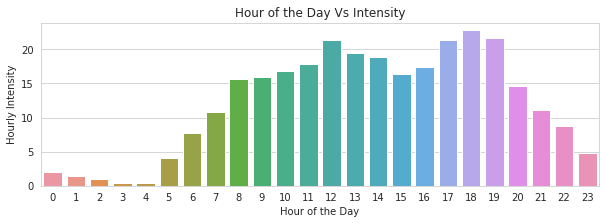

In [167]:
hourlyIntensity = hourlyStuff.groupby(['Hour']).agg({'TotalIntensity':'mean'}).reset_index()

plt.figure(figsize = (10,3))
hC = sns.barplot(data = hourlyIntensity,x = 'Hour',y = 'TotalIntensity')
hC.set(xlabel='Hour of the Day', ylabel='Hourly Intensity',
       title = 'Hour of the Day Vs Intensity')
plt.show()
#hourlyIntensity

##Predicting Daily Caloric with Polynomial Linear Regression

In [168]:
#Choosing promising variables from the dailyStuff Dataset
dailyStuff_filtered = dailyStuff[['TotalSteps','TotalDistance','VeryActiveDistance','ModeratelyActiveDistance',
                                 'LightActiveDistance','VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes',
                                 'SedentaryMinutes','TotalActiveMinutes','Calories']]
dailyStuff_filtered.head(4)

,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalActiveMinutes,Calories
0,10735,6.97,1.57,0.69,4.71,21,19,217,776,257,1797
1,10460,6.74,2.44,0.40,3.91,30,11,181,1218,222,1776
2,9762,6.28,2.14,1.26,2.83,29,34,209,726,272,1745
3,12669,8.16,2.71,0.41,5.04,36,10,221,773,267,1863


In [169]:
# split into input (X) and output (Y) variables
X = dailyStuff_filtered.iloc[:,:-1] #first 10 variables 
y = dailyStuff_filtered.iloc[:,-1] #Calory Data

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)#20% test size


#Getting Polynomials from variables
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree =2)
X_poly = poly_reg.fit_transform(X_train)

#Fitting the data to LinearRegressionModel
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_poly,y_train)

#Prediction
y_pred = regressor.predict(poly_reg.fit_transform(X_test))

#Measuring Accuracy with Mean Squared Error
from sklearn.metrics import mean_squared_error 
print("Mean Squared Error is: " + str(mean_squared_error(y_test,y_pred)))

Mean Squared Error is: 68758.09332769367


Then we optimized the model to improve prediction accuracy by removing some variables from the dataset.

In [170]:
newdf = dailyStuff_filtered[['TotalSteps','TotalDistance','VeryActiveDistance',
                                 'LightActiveDistance','VeryActiveMinutes','LightlyActiveMinutes',
                                 'SedentaryMinutes','Calories']]
X = newdf.iloc[:,:-1]
y = newdf.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)#20% test size

poly_reg = PolynomialFeatures(degree =2)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly,y_train)

y_pred= regressor.predict(poly_reg.fit_transform(X_test))

mean_squared_error(y_test,y_pred)

print("NEW Mean Squared Error is: " + str(mean_squared_error(y_test,y_pred)))

NEW Mean Squared Error is: 67886.74446436466


#Results and Conclusions

**Insights**
1. Clear positive correlation between activity and calories burned
2. Less sleep causes users to be less productive. So improving
3. Users are more likely to be active during the day time (duh...)
4. Cannot find a relationship between sleep duration and amount of calories burned
5. Longer a user is active, more likely for them to travel more (walk, run, etc..)
6. Activity level, Amount of activity is don't change much with differant days of the week (slightly higher on saturdays)
7. When travelling, users are most likely to be lightly active followed by very active, lastly moderately active

**Recommendations**

1. If bellabeat users want to reduce sedentary time, recommend them to improve their sleeping (sleep longer)
2. Recommend users who work sedentary jobs to exercise regularly
3. Collect more data from the bellabeat users (with their permission) for better analysis
4. Show bellabest users the benefits of increasing amount of steps taken. According to CDC, more than 10000 steps per day reduces the risk of injuries, and reduces mortality in general.
5. Suggest users recommended caloric intake based on their activity levels and their needs (lose weight, gain weight, etc.)